In [45]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
import torch.optim as optim
%matplotlib inline

In [8]:
mytransform = transforms.Compose([transforms.ToTensor(),
                    transforms.Normalize((0.7,), (0.7,))
                    ])     
train_set = datasets.MNIST(root = './data', train = True, transform = mytransform, download = True)
test_set = datasets.MNIST(root = './data', train = False, transform = mytransform, download = True)


In [9]:

split = 0.8
train_size = int(train_set.__len__() * split)
val_size = int(train_set.__len__()) - train_size
train, val = random_split(train_set, [train_size, val_size])
train_loader = DataLoader(train, batch_size=32, shuffle=True)
val_loader = DataLoader(val, batch_size = 32, shuffle=True)

In [10]:
iterator = iter(train_loader)
batch = next(iterator)
x, y = batch
print(x.shape)
print(y.shape)



torch.Size([32, 1, 28, 28])
torch.Size([32])


(28, 28)


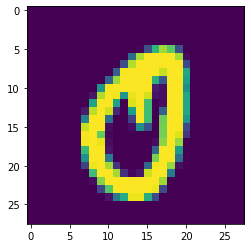

In [11]:
image = x[0].squeeze().numpy()
print(image.shape)
plt.imshow(image)

In [80]:

class mnistCNN(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.convLayer = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=3, dilation=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(6, 12, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )
        self.linerLayer = nn.Sequential(
            nn.Linear(1728, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax(dim=1)
        )
    def forward(self, x):
        x = self.convLayer(x)
        x = x.view(-1, 1728)
        x = self.linerLayer(x)
        return x

        


In [83]:
model = mnistCNN()
z = model(x)
print(z.shape)
a = z.sum(dim=1)
print(a)
print(a.shape)

torch.Size([32, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)
torch.Size([32])


In [82]:
model = mnistCNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
max_epochs = 15
for epoch in range(max_epochs):
    losses = []
    for i, batch in enumerate(val_loader, 0):
        x, y = batch
        optimizer.zero_grad()

        y_hat = model(x)
        loss = loss_fn(y_hat, y)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
    avg_loss = torch.tensor(losses).mean().item()
    print(epoch, " : ", avg_loss)




0  :  2.3005049228668213
1  :  1.8877514600753784
2  :  1.5985023975372314
3  :  1.5730897188186646
4  :  1.5545074939727783
5  :  1.5475393533706665
6  :  1.5389666557312012
7  :  1.5302194356918335
8  :  1.5252323150634766
9  :  1.5206761360168457
10  :  1.5140107870101929
11  :  1.510171890258789
12  :  1.5085145235061646
13  :  1.506251573562622
14  :  1.5028810501098633
